In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from pycaret.regression import *


def one_hot_encoder(df, nan_as_category=True):
    """質的変数をダミー変数に変換"""
    original_columns = list(df.columns)
    # dtypeがobject(i.e.str)の系列のカラム名をリストアップ
    categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
    # pd.get_dummiesでダミー変数に変換
    # 変換するカラムにはcategorical_columnsを指定
    # pd.get_dummiesではpandas.DataFrameを指定すると[元の列名_カテゴリー名]に変換される
    df = pd.get_dummies(df, columns=categorical_columns, dummy_na=nan_as_category)
    new_columns = [c for c in df.columns if c not in original_columns]
    return df, new_columns


def display_categorical_features(df, thresh=10):
    """データを最初にここに通して質的変数の確認を行う"""
    unique_count = df.select_dtypes('object').apply(pd.Series.nunique, axis=0)
    for idx in unique_count.index:
        if unique_count[idx] <= thresh:
            print(f"{idx}\t{unique_count[idx]}\t{df[idx].unique()}")
        else:
            print(f"{idx}\t{unique_count[idx]}")

In [2]:
df = pd.read_csv("train.csv").drop(["dateid"], axis=1)
display_categorical_features(df)
# df, new_columns = one_hot_encoder(df)

week	5	['Tue' 'Wed' 'Thu' 'Fri' 'Mon']
name	213
remarks	10	[nan 'お楽しみメニュー' '料理長のこだわりメニュー' 'スペシャルメニュー' '近隣に飲食店複合ビルオープン' '料理長イチオシ！'
 '料理長イチオシ!' '今月のイチオシ!' '今月のこだわりメニュー' 'コンビニ改装' '弁当種類増↓']
event	2	[nan 'ママの会' 'キャリアアップ支援セミナー']
weather	62


In [3]:
exp = setup(df, target="y", session_id=123, log_experiment=True, experiment_name="mufg")

,Description,Value
0,session_id,123
1,Target,y
2,Original Data,"(337, 11)"
3,Missing Values,True
4,Numeric Features,3
5,Categorical Features,7
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(235, 218)"


In [4]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
xgboost,Extreme Gradient Boosting,11.8938,252.2567,15.5878,0.3660,0.2411,0.2034,0.0730
br,Bayesian Ridge,12.3676,267.1045,16.2638,0.3287,0.2523,0.2132,0.0160
lasso,Lasso Regression,12.6251,275.2552,16.5353,0.3180,0.2510,0.2137,0.0050
rf,Random Forest Regressor,11.8031,267.5515,16.0292,0.3157,0.2398,0.1929,0.1740
ridge,Ridge Regression,12.3218,271.1776,16.3565,0.3128,0.2551,0.2134,0.0050
gbr,Gradient Boosting Regressor,12.2146,266.2614,16.0884,0.3115,0.2474,0.2069,0.0210
ada,AdaBoost Regressor,12.3391,276.7075,16.4900,0.3101,0.2468,0.2031,0.0180
lightgbm,Light Gradient Boosting Machine,12.7311,308.7012,17.2429,0.2616,0.2640,0.2131,0.0110
huber,Huber Regressor,12.9704,300.8293,17.1970,0.2507,0.2687,0.2180,0.0110
et,Extra Trees Regressor,12.8062,343.5373,18.2253,0.1190,0.2657,0.2059,0.1720


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100,
             n_jobs=-1, num_parallel_tree=1, objective='reg:squarederror',
             predictor='auto', random_state=123, reg_alpha=0, ...)

In [9]:
model = create_model("rf")
# model = create_model("br")
# model = create_model("lasso")
# model = create_model("ridge")
# model = create_model("gbr")
# model = create_model("xgboost")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,11.1692,198.2246,14.0792,0.6358,0.2127,0.1774
1,12.1979,212.5585,14.5794,0.6400,0.2171,0.1837
2,15.4142,472.8134,21.7443,-0.7792,0.3339,0.2828
3,8.3900,121.1085,11.0049,0.7458,0.1524,0.1283
4,10.7283,215.3260,14.6740,0.6903,0.2168,0.1736
5,14.7617,423.8513,20.5876,-0.1684,0.2779,0.2297
6,10.6096,198.7504,14.0979,0.4868,0.2227,0.1809
7,13.4983,288.9791,16.9994,0.4595,0.2362,0.2033
8,10.1261,182.9914,13.5274,0.3032,0.2587,0.2158


In [10]:
print(model)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=123, verbose=0, warm_start=False)


In [12]:
tuned_model = tune_model(model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,11.7251,233.3270,15.2750,0.5713,0.2377,0.1966
1,13.0103,248.2085,15.7546,0.5796,0.2373,0.1969
2,13.9391,401.0345,20.0258,-0.5091,0.2973,0.2502
3,8.6285,138.5169,11.7693,0.7092,0.1684,0.1394
4,12.1566,256.3696,16.0115,0.6312,0.2285,0.1912
5,13.9994,374.9779,19.3643,-0.0337,0.2704,0.2199
6,10.5127,187.3242,13.6866,0.5163,0.2206,0.1781
7,10.9750,169.1279,13.0049,0.6837,0.1726,0.1545
8,10.7874,210.7470,14.5171,0.1975,0.2870,0.2431


In [13]:
predict_model(tuned_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,9.2846,145.2279,12.0511,0.4976,0.1909,0.1507


,kcal,precipitation,temperature,week_Fri,week_Mon,week_Thu,week_Tue,week_Wed,soldout_0,name_いか天ぷら,...,weather_雨,weather_雨一時曇,weather_雨後一時曇,weather_雨後時々曇,weather_雨後曇,weather_雨後曇、雷を伴う,weather_雨時々曇,weather_雨時々曇一時雪,y,Label
0,433.000000,9.0,2.600000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,89.0,57.710678
1,404.000000,0.0,23.500000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,56.0,57.725005
2,433.000000,18.0,3.600000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,56.0,70.154851
3,420.000000,0.0,7.300000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44.0,47.363817
4,420.158661,0.0,8.900000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,121.0,108.765464
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,441.000000,0.0,27.900000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,58.0,59.274317
98,420.000000,1.5,25.700001,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,66.0,55.656379
99,436.000000,14.5,9.800000,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0,68.423772
100,435.000000,4.5,27.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54.0,56.650846


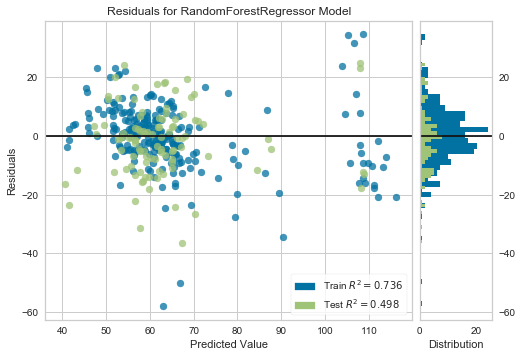

In [14]:
plot_model(tuned_model)

In [15]:
evaluate_model(tuned_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [16]:
final_model = finalize_model(tuned_model)

In [17]:
df_pred = pd.read_csv("test.csv")
df_dateid = df_pred["dateid"]
df_pred = df_pred.drop(["dateid"], axis=1)
df_pred = predict_model(final_model, data=df_pred)
# df_submit = pd.concat([df_dateid, df_pred["Label"]], axis=1)
# df_submit.columns = ["dateid", "y"]
# df_submit.to_csv("submit.csv", index=False, header=False)

In [19]:
hoge = predict_model(tuned_model)
hoge.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,9.2846,145.2279,12.0511,0.4976,0.1909,0.1507


,kcal,precipitation,temperature,week_Fri,week_Mon,week_Thu,week_Tue,week_Wed,soldout_0,name_いか天ぷら,...,weather_雨,weather_雨一時曇,weather_雨後一時曇,weather_雨後時々曇,weather_雨後曇,weather_雨後曇、雷を伴う,weather_雨時々曇,weather_雨時々曇一時雪,y,Label
0,433.000000,9.0,2.6,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,89.0,57.710678
1,404.000000,0.0,23.5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,56.0,57.725005
2,433.000000,18.0,3.6,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,56.0,70.154851
3,420.000000,0.0,7.3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44.0,47.363817
4,420.158661,0.0,8.9,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,121.0,108.765464


In [24]:
with open("colmuns.txt", "w", encoding="shift_jis") as f:
    f.write("\n".join(hoge.columns))